In [1]:
from owid.catalog import Dataset
from etl.paths import DATA_DIR
import matplotlib.pyplot as plt
import numpy as np
ds = Dataset(
    DATA_DIR
    / "meadow"
    / "tourism"
    / "2023-05-11"
    / "oecd_entr_empl"
)
print(ds.table_names)

['oecd_entr_empl']


In [43]:
df = ds["oecd_entr_empl"]
df.head()
df_empl_only =  df[df.columns[:3]]
df_empl_only = df_empl_only.rename(columns = {df_empl_only.columns[2]: 'empl_perc_total'})
                    

In [44]:
df_empl_only

,country,year,empl_perc_total
0,Argentina,2008,9.770
1,Argentina,2009,9.650
2,Argentina,2010,9.930
3,Argentina,2011,10.000
4,Argentina,2012,10.170
...,...,...,...
591,United States,2016,3.893
592,United States,2017,3.900
593,United States,2018,3.946
594,United States,2019,3.869


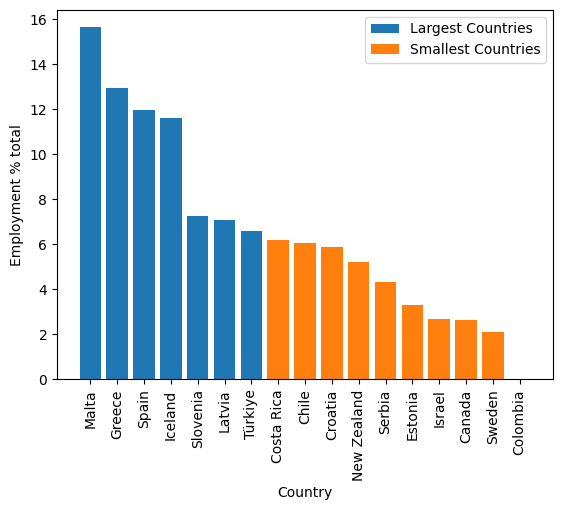

In [62]:
# Filter the DataFrame for the last 5 years
_2021 = df_empl_only[df_empl_only['year'] == 2021]

# Sort the DataFrame by the median value in descending order
df_sorted = _2021.sort_values(by='empl_perc_total', ascending=False)
df_sorted_dropna = df_sorted.dropna(axis = 0)
# Select the largest and smallest countries based on the sorted DataFrame
largest_countries = df_sorted_dropna.head(10)
smallest_countries = df_sorted_dropna.tail(10)

# Plot the data for the largest and smallest countries
fig, ax = plt.subplots()
ax.bar(largest_countries['country'], largest_countries['empl_perc_total'], label='Largest Countries')
ax.bar(smallest_countries['country'], smallest_countries['empl_perc_total'], label='Smallest Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Employment % total')
plt.xticks(rotation=90)
ax.legend()
plt.show()
